In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [46]:
experiments = []
percorso = "../models/exports/24_11/ticket_trend_"
for i in range(10):
    experiments.append(pd.read_csv(percorso+str(i)+".csv", names = ['Time','1','2','3','4','Abbonati','Utility','Total_risk']))
    experiments[i]['incremento']=zeros(len(experiments[i]['Time']))
    shifted = [0.0] + list(experiments[i]['Utility'])[:-1]
    experiments[i]['incremento'] = array(list(experiments[i]['Utility']))- array(shifted)

280.0
280.0
280.0
280.0
280.0
280.0
280.0
280.0
280.0
280.0


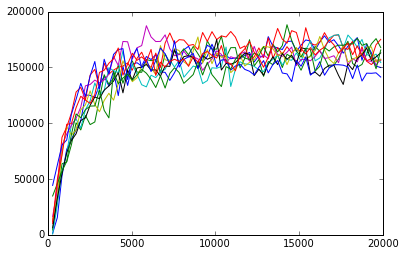

In [47]:
for expo in experiments:
        plot(expo['Time'],expo['incremento'])

In [48]:
time_utility = [[] for i in experiments[1]['Time']]#contiene tutti e 520 i tempi, e per ognuno, il rischio in ogni esperimento
for j in range(len(time_utility)):
    for expo in experiments:
        time_utility[j].append(expo['incremento'][j])
print shape(time_utility)

(71, 10)


In [49]:
medie = []
stds = []
for i in range(len(time_utility)):
    medie.append(mean(time_utility[i]))
    stds.append(std(time_utility[i]))

In [53]:
from scipy.optimize import curve_fit
def carica_cond (t,A,tao):
    return A*(1-exp(-t/tao))
print list(experiments[1]['Time'])
popt = curve_fit(carica_cond,list(experiments[1]['Time']),ravel(medie),sigma = ravel(stds),absolute_sigma=True,p0=(150000,1651))
print popt[0]
print popt[1]
A, tao = popt[0][0], popt[0][1]
#problemi con tao, lo trovo a mano sotto minimizzando il mean_squared

[280.0, 560.0, 840.0, 1120.0, 1400.0, 1680.0, 1960.0, 2240.0, 2520.0, 2800.0, 3080.0, 3360.0, 3640.0, 3920.0, 4200.0, 4480.0, 4760.0, 5040.0, 5320.0, 5600.0, 5880.0, 6160.0, 6440.0, 6720.0, 7000.0, 7280.0, 7560.0, 7840.0, 8120.0, 8400.0, 8680.0, 8960.0, 9240.0, 9520.0, 9800.0, 10080.0, 10360.0, 10640.0, 10920.0, 11200.0, 11480.0, 11760.0, 12040.0, 12320.0, 12600.0, 12880.0, 13160.0, 13440.0, 13720.0, 14000.0, 14280.0, 14560.0, 14840.0, 15120.0, 15400.0, 15680.0, 15960.0, 16240.0, 16520.0, 16800.0, 17080.0, 17360.0, 17640.0, 17920.0, 18200.0, 18480.0, 18760.0, 19040.0, 19320.0, 19600.0, 19880.0]
[ 159998.82648134    1691.27098444]
[[ 1670234.85307974    56127.35070083]
 [   56127.35070083    11245.24031967]]


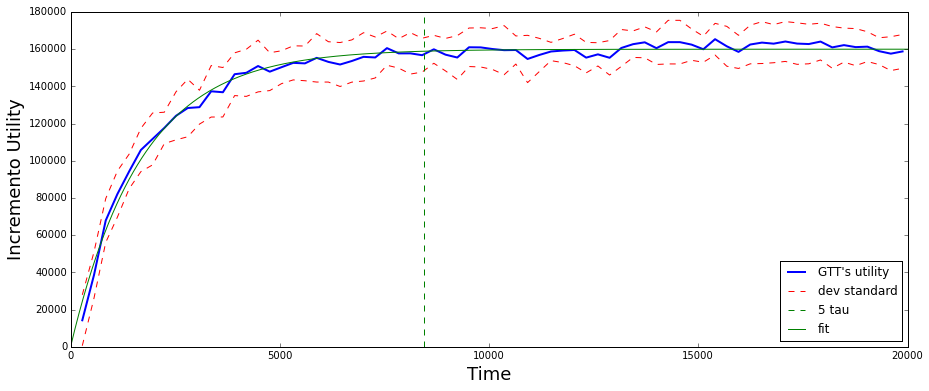

In [54]:
fig = plt.figure(2, figsize=(15, 6))
ax = fig.add_subplot(111)
graph = ax.plot(experiments[1]['Time'],medie,linewidth=2, label = 'GTT\'s utility')
graph2 = ax.plot(experiments[1]['Time'],array(medie)+array(stds),'r--',label = 'dev standard')
graph3 = ax.plot(experiments[1]['Time'],array(medie)-array(stds),'r--')
graph4 = ax.plot(tao*5*ones(100),linspace(1,180000,100),'g--', label = '5 tau')
x = linspace(1,20000,1000)
graph5 = ax.plot(x,A*(1-exp(-x/tao)),label='fit')

plt.xlabel('Time',fontsize=18)
plt.ylabel('Incremento Utility',fontsize=18)
plt.legend(loc=4)


savefig('Stabilita_coeff_utility.png')

In [36]:
import csv
with open('./Ensemble.csv','w') as csvfile:
    for i in range(len(medie)):
        csvfile.write(str(280*(i+1)) + ", " + str(ravel(medie)[i]) + ", " + str(stds[i]) + "\n" )